In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

In [2]:
d = {  'id'         :  np.int16,   
  'item_id'         :  np.int16,   
    'dept_id'       :  np.int16,   
    'cat_id'        :  np.int16,  
    'store_id'      :  np.int16,
     'd'            :  np.int16, 
    'state_id'      :  np.int8,  
    'sale'          :  np.int16,  
    'year'          :  np.int8, 
    'event_name_1'  :  np.int8,   
   'event_type_1'   :  np.int8,   
   'event_name_2'   :  np.int8,   
   'event_type_2'   :  np.int8,   
   'snap_CA'        :  np.int8,   
   'snap_TX'        :  np.int8,   
   'snap_WI'        :  np.int8,   
   'sell_price'     :  np.float32,
   'day'            :  np.int8,   
   'quarter'        :  np.int8,  
   'lag_49'          :  np.int16,  
   'lag_56'          :  np.int16,  
   'lag_63'         :  np.int16,  
   'lag_70'         :  np.int16,
   'lag_77'          :  np.int16, 
   'lag_28'         :  np.int16,  
   'lag_35'         :  np.int16,
   'lag_42'         :  np.int16,  
   'roll_mean_7'    :  np.float16,
   'roll_mean_14'   :  np.float16,
    'roll_mean_28'    :  np.float16,
   'roll_mean_49'   :  np.float16,
    'roll_std_7'    :  np.float16,
   'roll_std_14'   :  np.float16,
    'roll_std_28'    :  np.float16,
   'roll_std_49'   :  np.float16,
   'expanding_mean_item':  np.float32,
   'mean_id_sold'       :  np.float16,
   'std_id_sold'      : np.float16,
   'mean_id_price'    : np.float16,
    'std_id_price'    : np.float16}

In [3]:
df = pd.read_csv('final_fe2.csv',dtype = d)

train = df[(df['d']>1000)&(df['d']<=1913)]
train.to_csv('train_df.csv',index=False)

test = df[(df['d']>1913)&(df['d']<=1941)]
test.to_csv('test_df.csv',index=False)

final_sub = df[df['d']>1941]
final_sub.to_csv('final_sub.csv',index=False)

# Linear Model

In [4]:
train = pd.read_csv('train_df.csv',dtype = d)
train = train[train['d']>1200] #due to system issue did not train on complete dataset
val = pd.read_csv('test_df.csv',dtype = d)

In [5]:
train.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True) #removing these two columns as it was not adding much information
y_train = train['sale']
x_train = train.drop(columns = ['sale'])

del train

In [6]:
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_cv = val['sale']
x_cv = val.drop(columns = ['sale'])

del val

As we need only positive number prediction and for tweedie distribution, so instead of Linear regression I have proceeded with linear_model.TweedieRegressor model

In [7]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

params = {'alpha' : [0.01,0.1,0.5],
         'power': [0,1.1,1.5]}

alpha = []
power = []
RMSE_train = []
RMSE_cv = []

score = pd.DataFrame()
for a in tqdm(params['alpha']):
    for p in params['power']:
        reg = linear_model.TweedieRegressor(alpha=a,power=p)
        reg.fit(x_train,y_train)
        y_pred = reg.predict(x_train)
        y_cv_pred = reg.predict(x_cv)
        alpha.append(a)
        power.append(p)
        RMSE_train.append(mean_squared_error(y_train.to_numpy(), y_pred,squared=False))
        RMSE_cv.append(mean_squared_error(y_cv.to_numpy(), y_cv_pred,squared=False))
score['alpha'] = alpha
score['RMSE_train'] = RMSE_train
score['RMSE_cv'] = RMSE_cv
score['power'] = power
score

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: overflow encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:132: Runt

D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:247: RuntimeWarning: overflow encountered in power
  return np.power(y_pred, self.power)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: overflow encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
D:\softwares\miniconda\envs\env\lib\site-packages\sk

D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [1:40:13<00:00, 2004.64s/it]


,alpha,RMSE_train,RMSE_cv,power
0,0.01,2.364561,2.242338,0.0
1,0.01,3.598671,3.646440,1.1
2,0.01,3.598671,3.646440,1.5
3,0.10,2.364444,2.242096,0.0
4,0.10,3.598671,3.646440,1.1
5,0.10,3.598671,3.646440,1.5
6,0.50,2.365042,2.242062,0.0
7,0.50,3.598671,3.646440,1.1
8,0.50,3.598671,3.646440,1.5


In [8]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#training with best parameters
reg = linear_model.TweedieRegressor(alpha=0.05)
reg.fit(x_train,y_train)
pred = reg.predict(x_train)
y_pred = reg.predict(x_cv)
print('Train data RMSE is',mean_squared_error(y_train.to_numpy(), pred,squared=False))
print('CV data RMSE is',mean_squared_error(y_cv.to_numpy(), y_pred,squared=False))

D:\softwares\miniconda\envs\env\lib\site-packages\sklearn\linear_model\_glm\glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


Train data RMSE is 2.3644518331909614
CV data RMSE is 2.24183644561049


In [17]:
f = pd.read_csv('final_sub.csv',dtype = d) #d_1942 to d_1969 dataframe
f.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [18]:
y_test_f = f['sale']
x_test_f = f.drop(columns = ['sale'])

In [20]:
from sklearn.metrics import mean_squared_error
y_pred_f = reg.predict(x_test_f)

Private score - 1.35166

#### Best Alpha Value is 0.01

# Decision Tree

In [4]:
train = pd.read_csv('train_df.csv',dtype = d)
train = train[train['d']>1200] #due to system issue did not train on complete dataset
val = pd.read_csv('test_df.csv',dtype = d)

In [5]:
train.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_train = train['sale']
x_train = train.drop(columns = ['sale'])

del train

In [6]:
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_cv = val['sale']
x_cv = val.drop(columns = ['sale'])

del val

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dtr =  DecisionTreeRegressor(criterion='poisson')
dtr.fit(x_train,y_train)
pred = dtr.predict(x_train)
y_pred = dtr.predict(x_cv)
print('Train data RMSE is',mean_squared_error(y_train.to_numpy(), pred,squared=False))
print('CV data RMSE is',mean_squared_error(y_cv.to_numpy(), y_pred,squared=False))

Train data RMSE is 0.5620238237445486
CV data RMSE is 3.44992827292165


# Random Forest

In [4]:
train = pd.read_csv('train_df.csv',dtype = d)
train = train[train['d']>1200] #due to system issue did not train on complete dataset
val = pd.read_csv('test_df.csv',dtype = d)

In [5]:
train.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_train = train['sale']
x_train = train.drop(columns = ['sale'])

del train

In [6]:
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_cv = val['sale']
x_cv = val.drop(columns = ['sale'])

del val

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf =  RandomForestRegressor(criterion='poisson',n_estimators = 100,max_depth = 6,n_jobs = -1)
rf.fit(x_train,y_train)
pred = rf.predict(x_train)
y_pred = rf.predict(x_cv)
print('Train data RMSE is',mean_squared_error(y_train.to_numpy(), pred,squared=False))
print('CV data RMSE is',mean_squared_error(y_cv.to_numpy(), y_pred,squared=False))

Train data RMSE is 3.5767544603150205
CV data RMSE is 3.644474562649022


In [8]:
f = pd.read_csv('final_sub.csv',dtype = d) #d_1942 to d_1969 dataframe
f.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [9]:
y_test_f = f['sale']
x_test_f = f.drop(columns = ['sale'])

In [10]:
from sklearn.metrics import mean_squared_error
y_pred_f = rf.predict(x_test_f)

In [12]:
import pickle
pickle.dump(rf, open('RF_model.sav', 'wb'))

Private Score - 2.27301

with hyperparamter tuning both DT and RF model can be imporved

# XGBoost

In [3]:
train = pd.read_csv('train_df.csv',dtype = d)
train = train[train['d']>1200] #due to system issue did not train on complete dataset
val = pd.read_csv('test_df.csv',dtype = d)

In [4]:
from sklearn.preprocessing import StandardScaler
train.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_train = train['sale']
x_train = train.drop(columns = ['sale'])
    
del train

In [5]:
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_cv = val['sale']
x_cv = val.drop(columns = ['sale'])
del val

In [14]:
# Below code can be used for hyperparamter tuning
'''params = {
    'learning_rate': [0.01, 0.1,0.3],
    'max_depth': [10,30,50],
    'n_estimators' : [100, 200],
}

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


learning_rate = []
n_est = []
depth = []
RMSE_train = []
RMSE_cv = []
score = pd.DataFrame()
for lr in tqdm(params['learning_rate']):
    for n_e in params['n_estimators']:
        for d in params['max_depth']:
            xgbr = XGBRegressor(learning_rate = lr,
                                max_depth = d,
                                n_estimators = n_e,
                                objective = 'reg:tweedie',
                                subsample = 0.7,
                                colsample_bytree = 0.7,
                                n_jobs = 1)
            xgbr.fit(x_train,y_train)
            y_pred = xgbr.predict(x_train).astype(np.int32)
            y_cv_pred = xgbr.predict(x_cv).astype(np.int32)
            learning_rate.append(lr)
            n_est.append(n_e)
            depth.append(d)
            RMSE_train.append(mean_squared_error(y_train.to_numpy(), y_pred,squared=False))
            RMSE_cv.append(mean_squared_error(y_cv.to_numpy(), y_cv_pred,squared=False))

score['learning_rate'] =  learning_rate
score['n_estimators'] = n_est
score['depth'] = depth
score['RMSE_train'] = RMSE_train
score['RMSE_cv'] = RMSE_cv
score'''

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#trained with random paramter
xgbr = XGBRegressor(learning_rate = 0.15,
                    n_estimators = 75,
                    objective = 'reg:tweedie',
                    subsample = 0.5,
                    colsample_bytree = 0.5,
                    n_jobs = 1)
xgbr.fit(x_train,y_train)
pred = xgbr.predict(x_train)
y_pred = xgbr.predict(x_cv)
print('Train data RMSE is',mean_squared_error(y_train.to_numpy(), pred,squared=False))
print('CV data RMSE is',mean_squared_error(y_cv.to_numpy(), y_pred,squared=False))

D:\softwares\miniconda\envs\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Train data RMSE is 2.2657576
CV data RMSE is 2.1701338


In [8]:
import pickle
pickle.dump(xgbr, open('xgboost_model.sav', 'wb'))

In [9]:
f = pd.read_csv('final_sub.csv',dtype = d) #d_1942 to d_1969 dataframe
f.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [10]:
y_test_f = f['sale']
x_test_f = f.drop(columns = ['sale'])

In [12]:
from sklearn.metrics import mean_squared_error
y_pred_f = xgbr.predict(x_test_f)

Private Score - 0.67483
Accuracy Can be increased by choosing paramters after hyperparamter tuning

Checked for the Random Paramter. Did not perform Hyperparamter tuning as it takes lot of time. Instead we can use LightGBM model where it provides similar results in way lesser Time

# LightGBM Model

In [56]:
train = pd.read_csv('train_df.csv',dtype = d)
val = pd.read_csv('test_df.csv',dtype = d)

In [57]:
from sklearn.preprocessing import StandardScaler
train.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_train = train['sale']
x_train = train.drop(columns = ['sale'])

cat = ['id','item_id','dept_id','cat_id','store_id','state_id','year',
       'event_name_1','event_name_2','event_type_1','event_type_2','snap_CA','snap_TX','snap_WI',
      'day','quarter']

for ele in cat:  #we need to spacify dtype as category for categorical columns for LightGBM model
    x_train[ele] = pd.Series(x_train[ele],dtype='category')
    
del train

In [58]:
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
y_cv = val['sale']
x_cv = val.drop(columns = ['sale'])

for ele in cat:
    x_cv[ele] = pd.Series(x_cv[ele],dtype='category')

del val

In [6]:
params = {
    'learning_rate': [0.1,0.2],
    'num_leaves' : [50,100,150],
    'min_data_in_leaf' : [50,75,100],
    'n_estimators' : [100,200]
}

In [7]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

learning_rate = []
num_leaves = []
n_estimators = []
RMSE_train = []
RMSE_cv = []
min_data = []
score = pd.DataFrame()
for lr in tqdm(params['learning_rate']):
    for nl in params['num_leaves']:
        for mdl in params['min_data_in_leaf']:
            for ne in params['n_estimators']:
                lgbm = LGBMRegressor(learning_rate = lr,
                                     num_leaves = nl,
                                     min_data_in_leaf = mdl,
                                     n_estimators = ne,
                                     n_jobs= 1)
                lgbm.fit(x_train,y_train)
                y_pred = lgbm.predict(x_train)
                y_cv_pred = lgbm.predict(x_cv)
                learning_rate.append(lr)
                num_leaves.append(nl)
                min_data.append(mdl)
                n_estimators.append(ne)
                RMSE_train.append(mean_squared_error(y_train.to_numpy(), y_pred,squared=False))
                RMSE_cv.append(mean_squared_error(y_cv.to_numpy(), y_cv_pred,squared=False))
                
score['learning_rate'] =  learning_rate
score['n_estimators'] = n_estimators
score['num_leaves'] = num_leaves
score['min_data'] = min_data
score['RMSE_train'] = RMSE_train
score['RMSE_cv'] = RMSE_cv

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning]

 50%|██████████████████████████████████████▌                                      | 1/2 [5:15:20<5:15:20, 18920.85s/it]

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning]

100%|██████████████████████████████████████████████████████████████████████████████| 2/2 [10:17:56<00:00, 18538.10s/it]


In [8]:
score

,learning_rate,n_estimators,num_leaves,min_data,RMSE_train,RMSE_cv
0,0.1,100,50,50,2.176974,2.152726
1,0.1,200,50,50,2.109548,2.147529
2,0.1,100,50,75,2.177344,2.155126
3,0.1,200,50,75,2.115027,2.150168
4,0.1,100,50,100,2.180125,2.150732
5,0.1,200,50,100,2.114707,2.143590
6,0.1,100,100,50,2.115507,2.152499
7,0.1,200,100,50,2.032287,2.142324
8,0.1,100,100,75,2.118374,2.152329
9,0.1,200,100,75,2.038444,2.144834


### Best Parameters with Tweedie as objective Function and Power = 1.1

In [7]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
lgbm = LGBMRegressor(learning_rate = 0.1,
                     num_leaves = 50,
                     n_estimators = 200,
                     min_data_in_leaf = 100,
                     n_jobs= 1,
                    objective = 'tweedie',
                    tweedie_variance_power = 1.1)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


In [8]:
 mean_squared_error(y_train.to_numpy(), y_pred,squared=False) #RMSE for train data

2.194704964850303

In [73]:
del x_train
del y_train

In [9]:
from sklearn.metrics import mean_squared_error
y_pred = lgbm.predict(x_cv)
print('RMSE score for test data')
mean_squared_error(y_cv.to_numpy(), y_pred,squared = False)

RMSE score for test data


2.166043497142106

Private Score - 0.68122

### Without any objective function

In [59]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
lgbm = LGBMRegressor(learning_rate = 0.1,
                     num_leaves = 50,
                     n_estimators = 200,
                     min_data_in_leaf = 100,
                     n_jobs= 1)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


In [60]:
 mean_squared_error(y_train.to_numpy(), y_pred,squared=False) #RMSE for train data

2.1147072518697283

In [61]:
del x_train
del y_train

In [62]:
from sklearn.metrics import mean_squared_error
y_pred = lgbm.predict(x_cv)
print('RMSE score for test data')
mean_squared_error(y_cv.to_numpy(), y_pred,squared = False)

RMSE score for test data


2.143589670919594

In [63]:
pickle.dump(lgbm, open('LightGBM_model.sav', 'wb')) #model used in final pipeline

Private Score - 0.64121 -> with negative Predictions <br>
Private Score - 0.64101 -> After Clipping Negative predictions to Zero

Here trained LightGBM with both Tweedie as objective function and another one with default objective function i.e. Regression. Even though target column is tweedie distributed, LightGBM with tweedie did not perform better as Power value varies from item to item so using any particular power value may lead to accurate prediction only for that particular items whose power value matches. So, instead of tweedie, used default objective function where it performed better

#### Predicting on Last 28+28 days

In [30]:
f = pd.read_csv('final_sub.csv',dtype = d) #d_1942 to d_1969 dataframe
f.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [31]:
y_test_f = f['sale']
x_test_f = f.drop(columns = ['sale'])

for ele in cat:
    x_test_f[ele] = pd.Series(x_test_f[ele],dtype='category')

'''col = ['sell_price','lag_28','lag_35','lag_42','lag_49', 'lag_56','lag_63','lag_70', 'lag_77',
       'mean_id_price','expanding_mean_item','mean_id_sold',
       'roll_mean_28','roll_mean_7','roll_mean_14','roll_std_7','roll_std_14','roll_std_28','std_id_price','std_id_sold']
x_test_f[col] = scaler.transform(x_test_f[col])'''

"col = ['sell_price','lag_28','lag_35','lag_42','lag_49', 'lag_56','lag_63','lag_70', 'lag_77',\n       'mean_id_price','expanding_mean_item','mean_id_sold',\n       'roll_mean_28','roll_mean_7','roll_mean_14','roll_std_7','roll_std_14','roll_std_28','std_id_price','std_id_sold']\nx_test_f[col] = scaler.transform(x_test_f[col])"

In [32]:
from sklearn.metrics import mean_squared_error
y_pred_f = lgbm.predict(x_test_f)

### Feature Importance of final LightGBM model

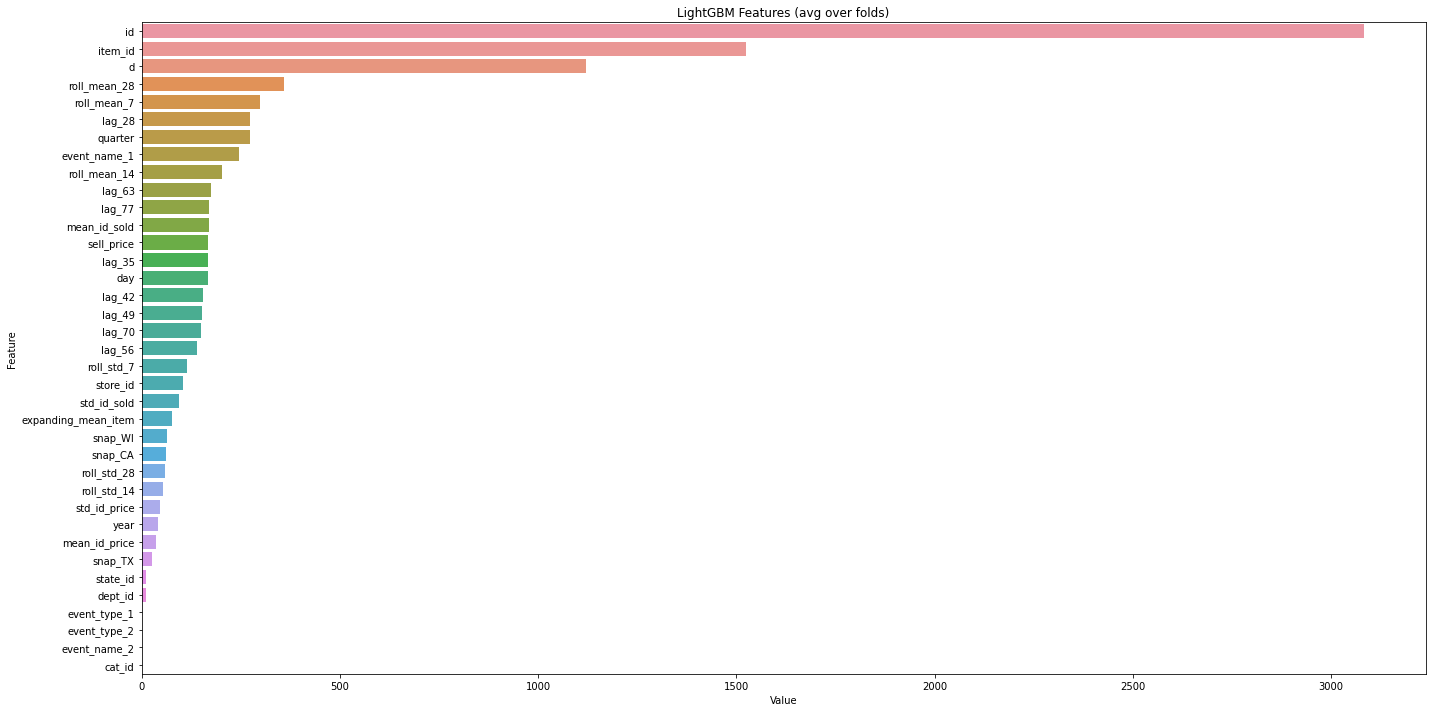

In [33]:
#https://www.kaggle.com/ashishpatel26/feature-importance-of-lightgbm#Feature-importance
#feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

# Different model for different department
### (Just Tried creating different model for different depatment)

In [10]:
le = pd.read_pickle('label_encoding.pickle')
le['dept_id']

{'FOODS_1': 0,
 'FOODS_2': 1,
 'FOODS_3': 2,
 'HOBBIES_1': 3,
 'HOBBIES_2': 4,
 'HOUSEHOLD_1': 5,
 'HOUSEHOLD_2': 6}

In [11]:
tweedie_power = [1.36,1.30,1.48,1.36,1,1.33,1] #https://www.kaggle.com/competitions/m5-forecasting-accuracy/discussion/153518

In [24]:
from lightgbm import LGBMRegressor
import pickle
from tqdm import tqdm

for key, value in  tqdm(le['dept_id'].items()):
    df = pd.read_csv('train_df.csv',dtype = d)
    df = df[df['dept_id']==value]
    df.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)
    y_train = df['sale']
    x_train = df.drop(columns = ['sale'])
    
    cat = ['id','item_id','dept_id','cat_id','store_id','state_id','year',
       'event_name_1','event_name_2','event_type_1','event_type_2','snap_CA','snap_TX','snap_WI',
      'day','quarter']
    for ele in cat:
        x_train[ele] = pd.Series(x_train[ele],dtype='category')
    del df
    
    lgbm = LGBMRegressor(learning_rate = 0.1,
                         num_leaves = 100,
                         min_data_in_leaf = 150,
                         n_jobs= 1)
    lgbm.fit(x_train,y_train) #Reading each csv file and fitting the model
    pickle.dump(lgbm, open('trained model/'+key+'.sav', 'wb')) #saving each model and will be evaluated on test data

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [15:32<00:00, 133.24s/it]


### 28+28 Days Prediction for Department Wise system

In [25]:
cat = ['id','item_id','dept_id','cat_id','store_id','state_id','year',
       'event_name_1','event_name_2','event_type_1','event_type_2','snap_CA','snap_TX','snap_WI',
      'day','quarter']

In [26]:
val = pd.read_csv('test_df.csv',dtype = d)
val.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [27]:
f = pd.read_csv('final_sub.csv',dtype = d) #d_1942 to d_1969 dataframe
f.drop(columns = ['roll_mean_49','roll_std_49'],inplace=True)

In [28]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import pickle

#calculating RMSE value on test data with respective dataframe and model
y_pred = []
y = []
for key, value in tqdm(le['dept_id'].items()):
    df1 = val[val['dept_id']==value]
    df2 = f[f['dept_id']==value]
    
    y_test = df1['sale']
    x_test = df1.drop(columns = ['sale'])

    for ele in cat:
        x_test[ele] = pd.Series(x_test[ele],dtype='category')

    y_test_f = df2['sale']
    x_test_f = df2.drop(columns = ['sale'])
    
    for ele in cat:
        x_test_f[ele] = pd.Series(x_test_f[ele],dtype='category')
    
    model = pickle.load(open('trained model/'+key+'.sav', 'rb'))
    y_pred = y_pred + list(model.predict(x_test))
    f.loc[f['dept_id']==value,'sale'] = model.predict(x_test_f)
    val.loc[val['dept_id']==value,'sale'] = model.predict(x_test)
    y = y + y_test.to_list()
print('Test Data RMSE value is ',mean_squared_error(y, y_pred, squared = False))

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:41<00:00,  5.96s/it]

Test Data RMSE value is  2.1537995219695936


In [8]:
y_pred = val['sale']
y_pred_f = f['sale']

Private Score - 0.69979 <br>
For Better score, Hyperparamter should be performed for each Model

## Preparing Submission CSV File

In [13]:
df = pd.read_csv('sample_submission.csv')
df.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
le = pd.read_pickle('label_encoding.pickle')
new_dict = dict([(value, key) for key, value in le['id'].items()])
new_dict #mapping label encoder

{0: 'FOODS_1_001_CA_1_evaluation',
 1: 'FOODS_1_001_CA_2_evaluation',
 2: 'FOODS_1_001_CA_3_evaluation',
 3: 'FOODS_1_001_CA_4_evaluation',
 4: 'FOODS_1_001_TX_1_evaluation',
 5: 'FOODS_1_001_TX_2_evaluation',
 6: 'FOODS_1_001_TX_3_evaluation',
 7: 'FOODS_1_001_WI_1_evaluation',
 8: 'FOODS_1_001_WI_2_evaluation',
 9: 'FOODS_1_001_WI_3_evaluation',
 10: 'FOODS_1_002_CA_1_evaluation',
 11: 'FOODS_1_002_CA_2_evaluation',
 12: 'FOODS_1_002_CA_3_evaluation',
 13: 'FOODS_1_002_CA_4_evaluation',
 14: 'FOODS_1_002_TX_1_evaluation',
 15: 'FOODS_1_002_TX_2_evaluation',
 16: 'FOODS_1_002_TX_3_evaluation',
 17: 'FOODS_1_002_WI_1_evaluation',
 18: 'FOODS_1_002_WI_2_evaluation',
 19: 'FOODS_1_002_WI_3_evaluation',
 20: 'FOODS_1_003_CA_1_evaluation',
 21: 'FOODS_1_003_CA_2_evaluation',
 22: 'FOODS_1_003_CA_3_evaluation',
 23: 'FOODS_1_003_CA_4_evaluation',
 24: 'FOODS_1_003_TX_1_evaluation',
 25: 'FOODS_1_003_TX_2_evaluation',
 26: 'FOODS_1_003_TX_3_evaluation',
 27: 'FOODS_1_003_WI_1_evaluation',
 2

In [15]:
test = pd.read_csv('test_df.csv',dtype = d)
test = test.replace({'id':new_dict})
test['id'] = test['id'].map(lambda x: x.replace('evaluation','validation')) #Changed required for kaggle submission
test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,year,event_name_1,...,roll_std_14,roll_mean_28,roll_std_28,roll_mean_49,roll_std_49,expanding_mean_item,mean_id_sold,std_id_sold,mean_id_price,std_id_price
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,1914,0,6,0,...,0.841797,1.036133,0.922363,1.061523,1.143555,0.3044,0.321533,0.704102,4.515625,4.128906
1,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,1914,0,6,0,...,0.497314,0.357178,0.488037,0.265381,0.446045,0.2610,0.253906,0.565430,3.687500,1.020508
2,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0,1914,0,6,0,...,0.425781,0.535645,1.201172,0.469482,0.959473,0.1442,0.156982,0.498291,1.312500,1.475586
3,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0,1914,0,6,0,...,2.173828,1.892578,1.968750,1.877930,1.844727,1.7170,1.694336,1.983398,4.449219,0.615723
4,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0,1914,1,6,0,...,1.099609,1.107422,0.994141,1.142578,1.136719,0.9610,0.958984,1.288086,2.773438,0.696777


In [16]:
test['d'] = test['d'].astype(str).map(lambda x: x.replace(x,'d_'+str(x)))
test['sale'] = y_pred

In [17]:
test.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,year,event_name_1,...,roll_std_14,roll_mean_28,roll_std_28,roll_mean_49,roll_std_49,expanding_mean_item,mean_id_sold,std_id_sold,mean_id_price,std_id_price
0,HOBBIES_1_001_CA_1_validation,1437,3,1,0,0,d_1914,1.236179,6,0,...,0.841797,1.036133,0.922363,1.061523,1.143555,0.3044,0.321533,0.704102,4.515625,4.128906
1,HOBBIES_1_002_CA_1_validation,1438,3,1,0,0,d_1914,1.236179,6,0,...,0.497314,0.357178,0.488037,0.265381,0.446045,0.2610,0.253906,0.565430,3.687500,1.020508
2,HOBBIES_1_003_CA_1_validation,1439,3,1,0,0,d_1914,1.236179,6,0,...,0.425781,0.535645,1.201172,0.469482,0.959473,0.1442,0.156982,0.498291,1.312500,1.475586
3,HOBBIES_1_004_CA_1_validation,1440,3,1,0,0,d_1914,1.236179,6,0,...,2.173828,1.892578,1.968750,1.877930,1.844727,1.7170,1.694336,1.983398,4.449219,0.615723
4,HOBBIES_1_005_CA_1_validation,1441,3,1,0,0,d_1914,1.236179,6,0,...,1.099609,1.107422,0.994141,1.142578,1.136719,0.9610,0.958984,1.288086,2.773438,0.696777


In [18]:
test_f = pd.read_csv('final_sub.csv',dtype = d)
test_f = test_f.replace({'id':new_dict})
test_f['d'] = test_f['d'].astype(str).map(lambda x: x.replace(x,'d_'+str(x)))
test_f['sale'] = y_pred_f
test_f.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,year,event_name_1,...,roll_std_14,roll_mean_28,roll_std_28,roll_mean_49,roll_std_49,expanding_mean_item,mean_id_sold,std_id_sold,mean_id_price,std_id_price
0,HOBBIES_1_001_CA_1_evaluation,1437,3,1,0,0,d_1942,1.236179,6,0,...,0.997070,0.928711,1.152344,1.020508,1.070312,0.3135,0.321533,0.704102,4.515625,4.128906
1,HOBBIES_1_002_CA_1_evaluation,1438,3,1,0,0,d_1942,1.236179,6,0,...,0.267334,0.035706,0.188965,0.163208,0.373535,0.2576,0.253906,0.565430,3.687500,1.020508
2,HOBBIES_1_003_CA_1_evaluation,1439,3,1,0,0,d_1942,1.236179,6,0,...,0.679199,0.571289,0.689941,0.469482,0.648926,0.1505,0.156982,0.498291,1.312500,1.475586
3,HOBBIES_1_004_CA_1_evaluation,1440,3,1,0,0,d_1942,1.236179,6,0,...,2.199219,1.821289,1.886719,1.917969,1.923828,1.7180,1.694336,1.983398,4.449219,0.615723
4,HOBBIES_1_005_CA_1_evaluation,1441,3,1,0,0,d_1942,1.236179,6,0,...,1.007812,1.357422,1.283203,1.286133,1.172852,0.9670,0.958984,1.288086,2.773438,0.696777


In [19]:
from tqdm import tqdm

F = ['F' + str(i) for i in range(1,29)]
for t1,t2 in tqdm(zip(test['id'].unique(),test_f['id'].unique())): #uploading all sales value to submission file
    df.loc[df['id']==t1,F] = test[test['id']==t1].sort_values('d')['sale'].tolist()
    df.loc[df['id']==t2,F] = test_f[test_f['id']==t2].sort_values('d')['sale'].tolist()

30490it [59:59,  8.47it/s]


In [20]:
df.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,...,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179
1,HOBBIES_1_002_CA_1_validation,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,...,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179
2,HOBBIES_1_003_CA_1_validation,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,...,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179
3,HOBBIES_1_004_CA_1_validation,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,...,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179
4,HOBBIES_1_005_CA_1_validation,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,...,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179,1.236179


In [21]:
df.to_csv('final_submission_RF.csv',index=False) #saving uploaded predicted sale value.

###### For Default Objective function we get negative prediction. So clipping those to zero

In [25]:
import pandas as pd
"Counting number of negative values"
df = pd.read_csv('final_submission_xgbr.csv')
count = 0
for ele in df.columns:
    if ele !='id':
        for ele2 in df[ele]:
            #print(ele2,ele)
            if ele2<0:
                count+=1
print(count)

0


In [52]:
import pandas as pd
"Negative values clipping to zero"
df = pd.read_csv('final_submission_LGBM_cat.csv')
for ele in df.columns:
    if ele !='id':
        for ele2,ids in zip(df[ele],df['id']):
            #print(ele2,ele)
            if ele2<0:
                df.loc[df['id']==ids,ele] = 0

In [53]:
import pandas as pd
"checking numnber of negative value after clipping"
#df = pd.read_csv('final_submission_LGBM.csv')
count = 0
for ele in df.columns:
    if ele !='id':
        for ele2 in df[ele]:
            #print(ele2,ele)
            if ele2<0:
                count+=1
print(count)

0


In [54]:
df.to_csv('LGBM_clipping_neg2zero.csv',index=False) #saving clipped values

#### SUMMARY

In [1]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Test/CV RMSE Value","Private Score"])
  
# Add rows
myTable.add_row(["Linear Model", "2.24","1.35166"])
myTable.add_row(["DT Model", "3.44","-"])
myTable.add_row(["Linear Model", "3.64","2.27301"])
myTable.add_row(["XGBoost", "2.17","0.67483"])
myTable.add_row(["LightGBM_Tweedie", "2.16","0.68122"])
myTable.add_row(["LightGBM", "2.14","0.64101"])
myTable.add_row(["Dept_LightGBM", "2.15","0.69979"])

print(myTable)

+------------------+--------------------+---------------+
|      Model       | Test/CV RMSE Value | Private Score |
+------------------+--------------------+---------------+
|   Linear Model   |        2.24        |    1.35166    |
|     DT Model     |        3.44        |       -       |
|   Linear Model   |        3.64        |    2.27301    |
|     XGBoost      |        2.17        |    0.67483    |
| LightGBM_Tweedie |        2.16        |    0.68122    |
|     LightGBM     |        2.14        |    0.64101    |
|  Dept_LightGBM   |        2.15        |    0.69979    |
+------------------+--------------------+---------------+
